<a href="https://colab.research.google.com/github/faizygithub/-Deep-Learning-with-PyTorch/blob/master/Tamil_Vowel_Consonent_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import  Image,ImageEnhance
import numpy as np
import warnings
import copy
from tqdm import tqdm_notebook
%matplotlib inline
warnings.filterwarnings('ignore')
from time import time

In [0]:
import torch
import torch.nn as nn 
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transfroms
import torch.nn.functional as F
from torchvision import models


In [0]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
os.environ['KAGGLE_USERNAME'] = "faizan2395" 
os.environ['KAGGLE_KEY'] = "715daf34eb81877ad648e683fe99637f"
!kaggle competitions download -c padhai-tamil-vowel-consonant-classification
!unzip -q test.zip
!unzip -q train.zip

sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.zip: Skipping, found more recently modified local copy (use --force to force download)
train.zip: Skipping, found more recently modified local copy (use --force to force download)
replace test/10000.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
replace train/V0_C0_25.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
trainset_img=os.listdir('train/')
print(trainset_img)

['V9_C1_9.png', 'V2_C7_31.png', 'V9_C9_42.png', 'V5_C4_69.png', 'V3_C2_95.png', 'V7_C2_89.png', 'V8_C7_12.png', 'V7_C7_92.png', 'V1_C4_76.png', 'V0_C4_57.png', 'V4_C0_8.png', 'V4_C8_4.png', 'V9_C2_93.png', 'V7_C8_98.png', 'V5_C4_63.png', 'V3_C6_71.png', 'V5_C5_49.png', 'V3_C6_83.png', 'V5_C6_24.png', 'V6_C8_42.png', 'V6_C1_20.png', 'V6_C5_35.png', 'V3_C1_44.png', 'V3_C2_60.png', 'V1_C2_47.png', 'V8_C5_14.png', 'V3_C2_52.png', 'V6_C3_53.png', 'V8_C6_53.png', 'V0_C9_34.png', 'V9_C3_76.png', 'V2_C9_9.png', 'V4_C0_59.png', 'V1_C7_73.png', 'V3_C6_86.png', 'V2_C6_14.png', 'V7_C2_39.png', 'V4_C7_74.png', 'V8_C0_44.png', 'V6_C4_50.png', 'V6_C0_65.png', 'V5_C8_64.png', 'V3_C7_72.png', 'V0_C2_35.png', 'V3_C3_32.png', 'V7_C0_18.png', 'V8_C9_19.png', 'V7_C3_56.png', 'V5_C9_8.png', 'V9_C6_7.png', 'V8_C1_47.png', 'V9_C4_67.png', 'V9_C1_28.png', 'V9_C9_23.png', 'V8_C8_99.png', 'V3_C4_75.png', 'V6_C9_63.png', 'V2_C2_26.png', 'V4_C6_49.png', 'V8_C2_17.png', 'V0_C3_61.png', 'V4_C2_3.png', 'V4_C1_18.png'

In [0]:
testset_img=os.listdir('test/')
print(testset_img)
#plt.imshow(np.array(testnset_img[0]))
#plt.show()

['144.png', '1983.png', '1496.png', '3975.png', '497.png', '1554.png', '2216.png', '5545.png', '3175.png', '1074.png', '3983.png', '5063.png', '4524.png', '6412.png', '6950.png', '8098.png', '5059.png', '3989.png', '8721.png', '8826.png', '9670.png', '2815.png', '4571.png', '6058.png', '8398.png', '962.png', '7309.png', '4428.png', '9986.png', '3749.png', '6125.png', '8358.png', '7764.png', '7119.png', '6380.png', '7020.png', '2376.png', '8856.png', '7710.png', '1594.png', '2394.png', '275.png', '8506.png', '9464.png', '227.png', '3995.png', '3731.png', '8661.png', '1747.png', '2322.png', '9438.png', '9748.png', '8684.png', '8673.png', '9419.png', '1015.png', '6947.png', '3516.png', '7563.png', '8977.png', '9321.png', '7018.png', '603.png', '9948.png', '2251.png', '6395.png', '3906.png', '3311.png', '998.png', '3511.png', '2400.png', '3374.png', '6065.png', '7387.png', '6532.png', '2340.png', '8011.png', '6867.png', '2390.png', '1848.png', '8447.png', '2451.png', '4717.png', '5922.png'

In [0]:
print(len(trainset_img))

10000


In [0]:
trainset_img=sorted(trainset_img)
print(trainset_img)

['V0_C0_1.png', 'V0_C0_10.png', 'V0_C0_100.png', 'V0_C0_11.png', 'V0_C0_12.png', 'V0_C0_13.png', 'V0_C0_14.png', 'V0_C0_15.png', 'V0_C0_16.png', 'V0_C0_17.png', 'V0_C0_18.png', 'V0_C0_19.png', 'V0_C0_2.png', 'V0_C0_20.png', 'V0_C0_21.png', 'V0_C0_22.png', 'V0_C0_23.png', 'V0_C0_24.png', 'V0_C0_25.png', 'V0_C0_26.png', 'V0_C0_27.png', 'V0_C0_28.png', 'V0_C0_29.png', 'V0_C0_3.png', 'V0_C0_30.png', 'V0_C0_31.png', 'V0_C0_32.png', 'V0_C0_33.png', 'V0_C0_34.png', 'V0_C0_35.png', 'V0_C0_36.png', 'V0_C0_37.png', 'V0_C0_38.png', 'V0_C0_39.png', 'V0_C0_4.png', 'V0_C0_40.png', 'V0_C0_41.png', 'V0_C0_42.png', 'V0_C0_43.png', 'V0_C0_44.png', 'V0_C0_45.png', 'V0_C0_46.png', 'V0_C0_47.png', 'V0_C0_48.png', 'V0_C0_49.png', 'V0_C0_5.png', 'V0_C0_50.png', 'V0_C0_51.png', 'V0_C0_52.png', 'V0_C0_53.png', 'V0_C0_54.png', 'V0_C0_55.png', 'V0_C0_56.png', 'V0_C0_57.png', 'V0_C0_58.png', 'V0_C0_59.png', 'V0_C0_6.png', 'V0_C0_60.png', 'V0_C0_61.png', 'V0_C0_62.png', 'V0_C0_63.png', 'V0_C0_64.png', 'V0_C0_65.pn

In [0]:
vowel=[]
consonant=[]
for value in trainset_img:
  vowel_idx=int(value[1])
  cons_idx=int(value[4])
  vowel.append(vowel_idx)
  consonant.append(cons_idx)


In [0]:
print(min(vowel),max(vowel))
print(min(consonant),max(consonant))

0 9
0 9


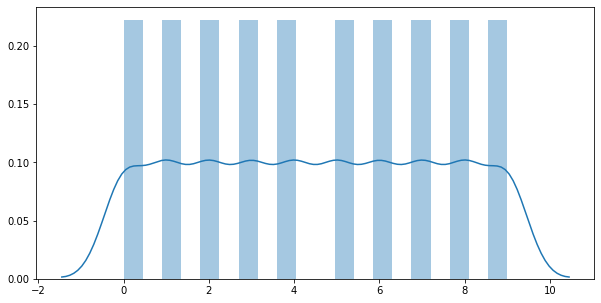

In [0]:
plt.figure(figsize=(10,5))
sns.distplot(vowel)

In [0]:
import pandas as pd
df= pd.read_csv("/content/drive/My Drive/vowel-consonant-mapping - Tamil.csv")
df.head(12)

,Unnamed: 0,Unnamed: 1,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
0,NaN,NaN,0,அ,ஆ,இ,ஈ,உ,ஊ,எ,ஏ,ஐ,ஒ,ஓ,ஔ
1,C0,0,ஃ,அ,ஆ,இ,ஈ,உ,ஊ,எ,ஏ,ஐ,ஒ,ஓ,ஔ
2,C1,க்,க்,க,கா,கி,கீ,கு,கூ,கெ,கே,கை,கொ,கோ,கௌ
3,C2,ங்,ங்,ங,ஙா,ஙி,ஙீ,ஙு,ஙூ,ஙெ,ஙே,ஙை,ஙொ,ஙோ,ஙௌ
4,C3,ச்,ச்,ச,சா,சி,சீ,சு,சூ,செ,சே,சை,சொ,சோ,சௌ
5,C4,ஞ்,ஞ்,ஞ,ஞா,ஞி,ஞீ,ஞு,ஞூ,ஞெ,ஞே,ஞை,ஞொ,ஞோ,ஞௌ
6,C5,ட்,ட்,ட,டா,டி,டீ,டு,டூ,டெ,டே,டை,டொ,டோ,டௌ
7,C6,ண்,ண்,ண,ணா,ணி,ணீ,ணு,ணூ,ணெ,ணே,ணை,ணொ,ணோ,ணௌ
8,C7,த்,த்,த,தா,தி,தீ,து,தூ,தெ,தே,தை,தொ,தோ,தௌ
9,C8,ந்,ந்,ந,நா,நி,நீ,நு,நூ,நெ,நே,நை,நொ,நோ,நௌ


In [0]:
vowels=list(df.iloc[1,2:12])
consonants=list(df.iloc[1:11,1])

In [0]:
print(vowels)

['ஃ', 'அ', 'ஆ', 'இ', 'ஈ', 'உ', 'ஊ', 'எ', 'ஏ', 'ஐ']


In [0]:
print(consonants)

['0', 'க்', 'ங்', 'ச்', 'ஞ்', 'ட்', 'ண்', 'த்', 'ந்', 'ப்']


In [0]:
transformer = transfroms.Compose([
                                  # transforms.Grayscale(1),
                                  transfroms.ToTensor(),
                                 transfroms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])

In [0]:
class DatasetTamil(Dataset):
  def __init__(self, folderpath, images_list, l_vowel=None, l_cons=None, train=True, transform=None ):
    self.folder_path=folderpath
    self.images_list =  images_list
    self.l_vowel = l_vowel
    self.l_cons = l_cons
    self.transform= transform

  def __len__(self):
    return len(self.images_list)

  def __getitem__(self, index):
    filepath= os.path.join(self.folder_path, self.images_list[index])
    image = Image.open(filepath).convert('RGB')
    image= ImageEnhance.Sharpness(image).enhance(3.0)
    
    if self.transform is not None:
      # print(image.shape)
      image = self.transform(image)
      # print(image.shape)
    if self.l_vowel is not None:
      l_v = self.l_vowel[index]

    if self.l_cons is not None:
      l_c = self.l_cons[index]

    return image, l_v, l_c

In [0]:
trainset = DatasetTamil('train/', trainset_img, vowel, consonant, transform=transformer)
testset=DatasetTamil('test/', testset_img, vowel, consonant,train=False, transform=transformer)
batch=8
trainloader=DataLoader(trainset, batch_size= batch, shuffle= False)
testloader=DataLoader(testset, batch_size= batch, shuffle= False)
#image, lab_vowel, lab_cons= iter(trainloader).next()
dataiter = iter(trainloader)
image, lab_vowel,lab_cons = dataiter.next()

print(lab_vowel)
# displaying the image post transforms

tensor([0, 0, 0, 0, 0, 0, 0, 0])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 0, '0 ஃ')

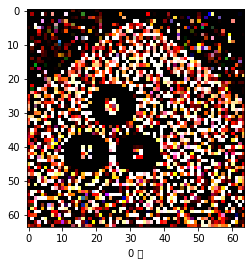

In [0]:

npimg=np.array(image)
npimg= np.transpose(npimg, (0,2,3,1))
sample = np.random.randint(batch)
sample=0
#Transformed Image
plt.figure()
plt.imshow(npimg[sample,:,:,:])
plt.xlabel(str(consonants[lab_cons[sample]])+" "+str(vowels[lab_vowel[sample]]))

In [0]:
device="cuda:0" if torch.cuda.is_available() else "cpu"
type(device)
print(device)

cuda:0


In [0]:
resnet_v=models.resnet18(pretrained=True)
resnet_c=models.resnet18(pretrained=True)

In [0]:
print(resnet_v)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
final_in_features= resnet_v.fc.in_features
resnet_v.fc=nn.Linear(final_in_features, out_features=10 , bias=True)

final_in_features= resnet_c.fc.in_features
resnet_c.fc=nn.Linear(final_in_features, out_features=10 , bias=True)

In [0]:
def evaluation(dataloader, model_v, model_c):
    total, correct_v, correct_c= 0, 0, 0
    for data in dataloader:
        inputs, lab_v, lab_c= data
        inputs, lab_v, lab_c= inputs.to(device), lab_v.to(device), lab_c.to(device)

        outputs_v = model_v(inputs.double())
        outputs_c = model_c(inputs.double())

        # print(outputs_v.shape)
        _, pred_v =torch.max(outputs_v, 1)
        # print(pred_v, lab_v)
        _, pred_c =torch.max(outputs_c, 1)
        total+= lab_v.size(0)
        correct_v+= (pred_v==lab_v).sum().item()
        correct_c+= (pred_c==lab_c).sum().item()
    return pred_v, pred_c, 100* correct_v/total, 100* correct_c/total

In [0]:
model_v = resnet_v.double().to(device)
model_c = resnet_c.double().to(device)
loss_fn=nn.CrossEntropyLoss()

In [0]:
#model_v.load_state_dict(torch.load("/content/drive/My Drive/best_model_tamil_v.pth"))
#model_c.load_state_dict(torch.load("/content/drive/My Drive/best_model_tmail_c.pth"))

In [0]:
opt_v=optim.Adam(model_v.parameters(), lr=0.001 )
opt_c=optim.Adam(model_c.parameters(), lr=0.001 )

In [0]:
batch= 128
trainloader = DataLoader(trainset, batch_size=batch, shuffle=True, num_workers=1)
testloader=DataLoader(testset, batch_size= batch, shuffle= False)
# evalloader= DataLoader(evalset, batch_size=batch_size, shuffle=False)
# testloader= DataLoader(testset, batch_size=X_test.shape[0],shuffle=False)

2.460456750948568


2.596717087380452


0.8318419657783978


0.6673519065443215


0.5333004126929952


0.16909879585301385


0.0705546419992343


0.36400352727821184


0.3513119059580432


0.30982681047018074

Training time: 811.8234946727753


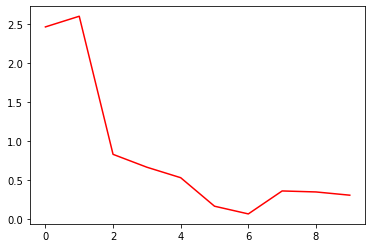

Loss:
Training vowel Accuracy: 9.86 consonant accuracy: 10.11
Test vowel Accuracy: 9.86 consonant accuracy: 10.11


In [0]:
# using two faced fc
tic=time()

model_v.train()
model_c.train()
loss_per_epoch=[]
loss_arr=[]
max_epochs= 10
min_loss=1000
n_iters=np.ceil(10000/batch)
for epoch in tqdm_notebook(range(max_epochs), total=max_epochs, unit='epochs'):
    # tic=time()
    for _,data in enumerate(tqdm_notebook(trainloader, total=len(trainloader), unit='batches')):
        # toc=time()
        # print("Dataloading Time:", toc-tic)
        # tic=time()
        inputs, lab_v, lab_c = data
        inputs, lab_v, lab_c = inputs.to(device), lab_v.to(device), lab_c.to(device)
        # toc=time()
        # print("Data Loading to gpu time:",toc-tic)
        opt_v.zero_grad()
        opt_c.zero_grad()

        # tic=time()
        outputs_v = model_v(inputs.double())
        outputs_c = model_c(inputs.double())
        # toc=time()
        # print("predicting output time:",toc-tic)

        # tic=time()
        loss=loss_fn(outputs_v, lab_v) + loss_fn(outputs_c, lab_c)
        loss.backward()
        # toc=time()
        # print("Calculating loss and gradients:",toc-tic)

        # tic= time()
        opt_v.step()
        opt_c.step()
        # toc=time()
        # print("Updating the weights:",toc-tic)
        # loss_arr.append(loss.item())
        # if min_loss>loss.item():
        #     min_loss=loss.item()
        #     best_model=copy.deepcopy(model.state_dict())
        # if i % 8==0:
        #     print("Epoch: %d Iteration: %d/%d Loss: %0.3f" %(epoch, i, n_iters, loss.item()))
        del inputs, lab_v, lab_c, outputs_v, outputs_c
        # torch.cuda.empty_cache()
    print(loss.item())
    loss_per_epoch.append(loss.item())
toc=time()
print("Training time:", toc-tic)
plt.plot(loss_per_epoch, 'r')
plt.show()
best_model_v=copy.deepcopy(model_v.state_dict())
best_model_c=copy.deepcopy(model_c.state_dict())
torch.save(best_model_v,"/content/drive/My Drive/best_model_tamil_v.pth")
torch.save(best_model_c,"/content/drive/My Drive/best_model_tamil_c.pth")

model_v.load_state_dict(best_model_v)
model_c.load_state_dict(best_model_c)

model_v.eval()
model_c.eval()

# torch.save(best_model,"../input/checkpoint/best_model.pth")
# model.load_state_dict(best_model)
# with torch.no_grad():
_, _, acc_v, acc_c= evaluation(trainloader, model_v, model_c)

_, _, acc_v, acc_c= evaluation(testloader, model_v, model_c)

print("Loss:")
print("Training vowel Accuracy: %0.2f consonant accuracy: %0.2f" %( acc_v , acc_c ))
print("Test vowel Accuracy: %0.2f consonant accuracy: %0.2f" %( acc_v , acc_c ))
# print("Test Accuracy: %0.2f" %(evaluation(evalloader,model)))